In [342]:
#Set up environment
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

pd.set_option('max_rows',100)

In [20]:
#Read csv
df = pd.read_csv("/kaggle/input/whatnot/Analytics_Take_Home_Test_2022_March.csv",parse_dates=["PURCHASED_AT", "BUYER_SIGNUP_AT", "SELLER_SIGNUP_AT", "SELLER_FIRST_LIVESTREAM_DATE"])
df.head()

# Exploratory Analysis
We want to get a feel of the data and missing info.

Answer the following:
* WHO: who are the buyers and the sellers?
* WHAT: what was purchased? what are the prices like?
* WHEN: when was the purchase made? any trends between signup dates vs purchase dates?
* WHERE: where was the purchase made (in which category, what channel, etc.)?

In [3]:
#Examine the size of the dataset, the data types, and time range
df.info()

print("\nThis data is for purchases in the following range:")
df["PURCHASED_AT"].min(), df["PURCHASED_AT"].max()

In [113]:
#Examine the number of unique buyers, ordered by purchase frequency
print(df.USER_ID.value_counts())

#Examine the buyers and their number of purchases
print("\n",df.USER_ID.value_counts().describe())
print("\nBuyers with missing signup dates: ", df.loc[df.BUYER_SIGNUP_AT.isnull()].USER_ID.unique())
plt.boxplot(df.USER_ID.value_counts())


In [30]:
df.STATE.unique()

In [34]:
#Replace long-form state names with codes
df.STATE.replace(["Michigan","Minnesota","Texas"],["MI","MN","TX"], inplace=True)

In [277]:
#Examine the locations (states) where buyers are making their purchases
print(df.groupby("STATE")["USER_ID"].nunique().sort_values(ascending=False).head(20))
print("\nThe total number of 'state' locations grouped by user_id: ", df.groupby("STATE")["USER_ID"].nunique().sum())
print("\nNumber of different buyer locations: ", len(df.STATE.unique()))
plt.figure(figsize=(40, 8))
sns.histplot(df.STATE)
plt.savefig('state.png')

In [63]:
# Examine the number of buyers who are also sellers (grouped by buyer ID, not just individual purchases)
df.groupby("BUYER_IS_SELLER")["USER_ID"].nunique()

In [91]:
# How many users bought AND sold something during this period? (a.k.a. benefitted both sides of the market)
seller_and_buyer = [user for user in df.USER_ID.unique() if user in df.SELLER_ID.unique()]
print("Number of users who bought AND sold something: ",len(seller_and_buyer))
print("\nNumber of purchases made by these users: ",df.USER_ID.value_counts().loc[seller_and_buyer].sum())

In [114]:
# Examine the sellers
print("Number of unique sellers: ", len(df.SELLER_ID.unique()))

print(df.SELLER_ID.value_counts())

print("\n",df.SELLER_ID.value_counts().describe())
plt.boxplot(df.SELLER_ID.value_counts())

In [222]:
# Plots for buyers and sellers by frequency
plt.figure(figsize=(25, 5))
ax=sns.boxplot(df.USER_ID.value_counts(),showfliers=False)
plt.savefig('buyer_freq_box.png')

In [223]:
plt.figure(figsize=(25, 5))
ax=sns.boxplot(df.SELLER_ID.value_counts(),showfliers = False)
plt.savefig('seller_freq_box.png')

In [149]:
# Examine the time deltas
df["time_to_purchase"]=df.PURCHASED_AT - df.BUYER_SIGNUP_AT
df["time_to_sale"]=df.PURCHASED_AT - df.SELLER_SIGNUP_AT
df["first_stream_to_sale"]=df.PURCHASED_AT - df.SELLER_FIRST_LIVESTREAM_DATE
df["time_to_first_stream"]=df.SELLER_FIRST_LIVESTREAM_DATE - df.SELLER_SIGNUP_AT

In [324]:
# Examine users who first signed up during this period

# Buyers
df1 = df.loc[df.BUYER_SIGNUP_AT>df["PURCHASED_AT"].min()]
print("Number of buyers who first signed up during this time period: ",len(df1.USER_ID.unique()))
print("Average time from buyer sign up to first purchase in this period: ",df1.groupby("USER_ID").time_to_purchase.min().mean())

# Sellers
df2 = df.loc[df.SELLER_SIGNUP_AT>df["PURCHASED_AT"].min()]
print("Number of sellers who first signed up during this time period: ",len(df2.SELLER_ID.unique()))
print("Average time from seller sign up to first sale in this period: ",df2.groupby("SELLER_ID").time_to_sale.min().mean())
print("Average time from seller sign up to first same through standard channel in this period: ", df2.loc[df.SALES_CHANNEL == "STANDARD"].groupby("SELLER_ID").time_to_sale.min().mean())

# Sellers who also hosted their first live stream during this time
df3 = df2.loc[df.SELLER_FIRST_LIVESTREAM_DATE<df["PURCHASED_AT"].max()]
print("Average time from seller's first live stream to first sale in this period",df3.groupby("SELLER_ID").first_stream_to_sale.min().mean())
print("Average time from seller signup to first live stream in this period: ", df3.groupby("SELLER_ID").time_to_first_stream.min().mean())

In [159]:
# Examine sales_channel, style, and status
print(df.SALES_CHANNEL.value_counts())

print("\n",df.STYLE.value_counts())

print("\n",df.STATUS.value_counts())

In [167]:
# Examine product categories
print("Number of orders per category: \n",df.LIVESTREAM_CATEGORY.value_counts())
print("\nNumber of buyers per category: \n",df.groupby("LIVESTREAM_CATEGORY")["USER_ID"].nunique().sort_values(ascending=False))
print("\nNumber of sellers per category: \n", df.groupby("LIVESTREAM_CATEGORY")["SELLER_ID"].nunique().sort_values(ascending=False))

In [174]:
# Examine price
print("Total sales (in $): $", df.SUBTOTAL_CENTS.sum()/100)
print("Average sales per order: $", df.SUBTOTAL_CENTS.sum()/100/df.shape[0])
print(df.SUBTOTAL_CENTS.describe())
plt.boxplot(df.SUBTOTAL_CENTS)

In [224]:
plt.figure(figsize=(25, 5))
ax=sns.boxplot(df.SUBTOTAL_CENTS,showfliers = False)
plt.savefig('price_boxplot.png')

In [227]:
plt.figure(figsize=(25, 5))
ax=sns.boxplot(df.SUBTOTAL_CENTS)
#plt.savefig('price_boxplot.png')

In [230]:
# price by category (outliers removed)
plt.figure(figsize=(30, 10))
ax=sns.boxplot(x="LIVESTREAM_CATEGORY", y="SUBTOTAL_CENTS", data=df, showfliers = False)
ax.axhline(5349,color='r') #mean
ax.axhline(2000, color='b') #median
plt.savefig('price_category.png')

In [232]:
# price by channel (outliers removed)
plt.figure(figsize=(15, 10))
ax=sns.boxplot(x="SALES_CHANNEL", y="SUBTOTAL_CENTS", data=df, showfliers = False)
ax.axhline(5349,color='r') #mean
ax.axhline(2000, color='b') #median
plt.savefig('price_channel.png')

In [234]:
# price by channel (outliers removed)
plt.figure(figsize=(15, 10))
ax=sns.boxplot(x="STYLE", y="SUBTOTAL_CENTS", data=df, showfliers = False)
ax.axhline(5349,color='r') #mean
ax.axhline(2000, color='b') #median
plt.savefig('price_style.png')

In [322]:
#Examine day of week trends (Monday = 0)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(25,10))
sns.histplot(df["PURCHASED_AT"].dt.day_of_week,ax=axs[0,0])
sns.histplot(df["BUYER_SIGNUP_AT"].dt.day_of_week,ax=axs[0,1])
sns.histplot(df["SELLER_SIGNUP_AT"].dt.day_of_week,ax=axs[1,0])
sns.histplot(df["SELLER_FIRST_LIVESTREAM_DATE"].dt.day_of_week,ax=axs[1,1])
plt.savefig('day_week.png')

In [292]:
from datetime import datetime
from pytz import timezone
import pytz

pt = ["CA", "WA", "OR", "NV"]
mt = ["MT", "ID", "WY", "UT", "CO","AZ","NM"]
ct=["ND","SD","NE","KS","OK","TX","MN","IA","MO","AR","LA","MS","AL","TN","IL","WI"]
et=["MI","IN","KY","GA","FL","SC","NC","VA","WV","OH","PA","NY","VT","ME","NH","MA","RI","CT","NJ","DE","MD","DC"]

df_pt = df.loc[df["STATE"].isin(pt)]
df_mt = df.loc[df["STATE"].isin(mt)]
df_ct = df.loc[df["STATE"].isin(ct)]
df_et = df.loc[df["STATE"].isin(et)]

In [ ]:
df_pt["local_time"]=df_pt["PURCHASED_AT"].apply(lambda row: row.astimezone('US/Pacific'))
df_ct["local_time"]=df_ct["PURCHASED_AT"].apply(lambda row: row.astimezone('US/Central'))
df_et["local_time"]=df_et["PURCHASED_AT"].apply(lambda row: row.astimezone('US/Eastern'))
df_mt["local_time"]=df_mt["PURCHASED_AT"].apply(lambda row: row.astimezone('US/Mountain'))

df_pt["local_time_buyer_signup"]=df_pt["BUYER_SIGNUP_AT"].apply(lambda row: row.astimezone('US/Pacific'))
df_ct["local_time_buyer_signup"]=df_ct["BUYER_SIGNUP_AT"].apply(lambda row: row.astimezone('US/Central'))
df_et["local_time_buyer_signup"]=df_et.loc[df.BUYER_SIGNUP_AT.notnull()]["BUYER_SIGNUP_AT"].apply(lambda row: row.astimezone('US/Eastern'))
df_mt["local_time_buyer_signup"]=df_mt["BUYER_SIGNUP_AT"].apply(lambda row: row.astimezone('US/Mountain'))

df_pt["local_time_seller_signup"]=df_pt["SELLER_SIGNUP_AT"].apply(lambda row: row.astimezone('US/Pacific'))
df_ct["local_time_seller_signup"]=df_ct["SELLER_SIGNUP_AT"].apply(lambda row: row.astimezone('US/Central'))
df_et["local_time_seller_signup"]=df_et["SELLER_SIGNUP_AT"].apply(lambda row: row.astimezone('US/Eastern'))
df_mt["local_time_seller_signup"]=df_mt["SELLER_SIGNUP_AT"].apply(lambda row: row.astimezone('US/Mountain'))

df_pt["local_time_seller_1stlivestream"]=df_pt["SELLER_FIRST_LIVESTREAM_DATE"].apply(lambda row: row.astimezone('US/Pacific'))
df_ct["local_time_seller_1stlivestream"]=df_ct["SELLER_FIRST_LIVESTREAM_DATE"].apply(lambda row: row.astimezone('US/Central'))
df_et["local_time_seller_1stlivestream"]=df_et["SELLER_FIRST_LIVESTREAM_DATE"].apply(lambda row: row.astimezone('US/Eastern'))
df_mt["local_time_seller_1stlivestream"]=df_mt["SELLER_FIRST_LIVESTREAM_DATE"].apply(lambda row: row.astimezone('US/Mountain'))

df_localtime = pd.concat([df_pt,df_ct,df_mt,df_et],axis=0)

In [323]:
#Examine time trends

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(25,10))
sns.histplot(df_pt["PURCHASED_AT"].dt.hour, ax=axs[0,0])
sns.histplot(df_pt["BUYER_SIGNUP_AT"].dt.hour, ax=axs[0,1])
sns.histplot(df["SELLER_SIGNUP_AT"].dt.hour, ax=axs[1,0])
sns.histplot(df["SELLER_FIRST_LIVESTREAM_DATE"].dt.hour, ax=axs[1,1])
plt.savefig('hour_day.png')

In [261]:
# Examine by category...
df.groupby([df["PURCHASED_AT"].dt.weekday, "LIVESTREAM_CATEGORY"])["SUBTOTAL_CENTS"].mean()

# Some findings
**Buyers**
* 2231 unique buyers, of which 1014 signed up for the first time during this period
* mean number of purchases per buyer: 27; median number of purchases per buyer: 7
* max number of purchases: 1358
* majority made between 2 and 25 purchases during this period
* Boxplot of buyer order frequency (outliers removed)
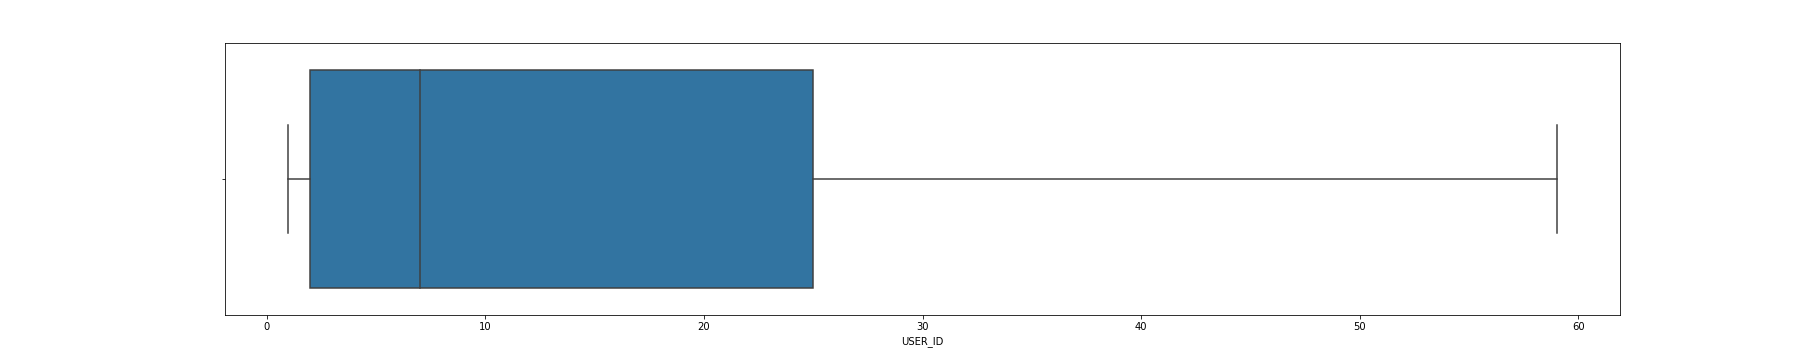
* The 36 missing BUYER_SIGNUP_AT dates are from one user (USER_ID: 424581)
- More than 50% of the buyers are from CA, FL, TX, NY, NJ, PA, OH, IL, AZ, MI (making up 1385/2252 "location of the buyer")
    - 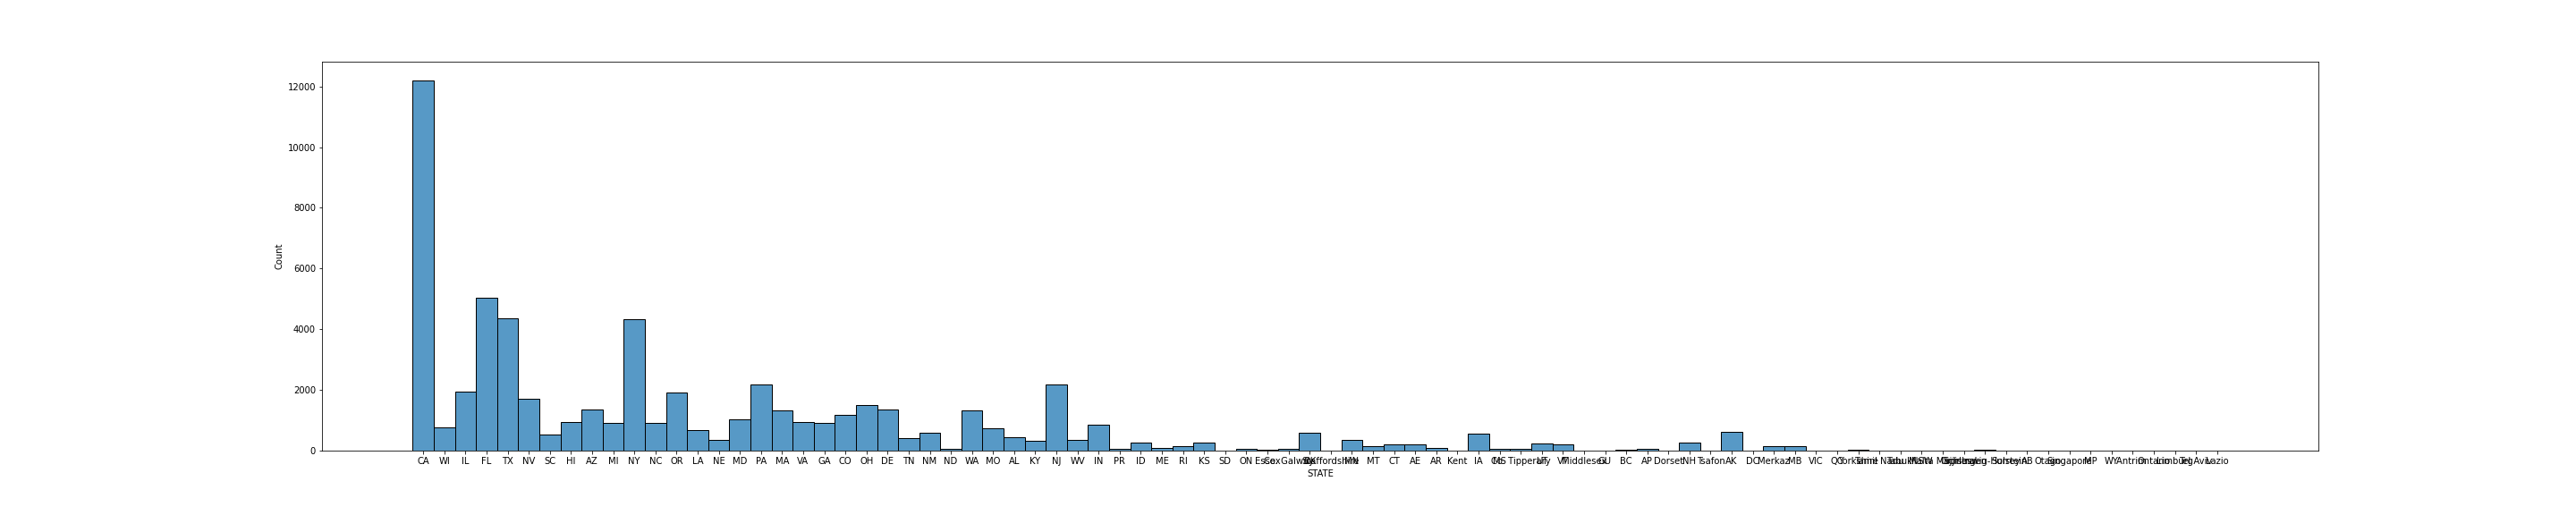
* Of the buyers who signed up during this period, it took them on average 6 days to make their first purchase during this period
* 486 of these 2231 buyers are also sellers
* 74 buyers (3.3% of these buyers) also sold something during this period, making up 5723 out of 60822 purchases during this period (9.4%)

**Sellers**
* 2353 unique sellers, 310 signed up for the first time during this period
* mean number of sales per seller: 26; median number of sales per seller: 3
* max number of sales: 2156
* majority made between 1 and 17 sales during this period
* Boxplot of seller order frequency (outliers removed)
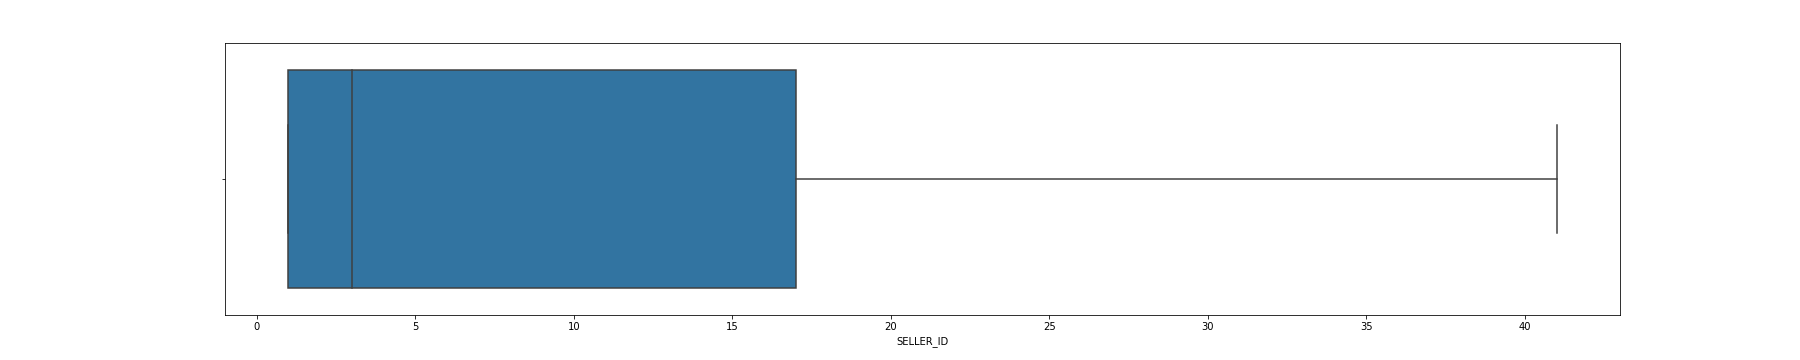
- Of the sellesr who signed up during this period,
    - it took them on average 28 days to make their first sale during this period through the standard channel
    - if they hosted their first livestream during this period, it took them on average 2 days to make their first sale during this period

**Style and status**
- Almost 100% of orders are Direct orders (style) and completed (status). The other combinations do not make up a significant % of orders to warrant examination.
- However, there does seem to be a difference in sale price between the different styles -- orders and offers seem to have a higher median sale price per order than direct orders and direct offers
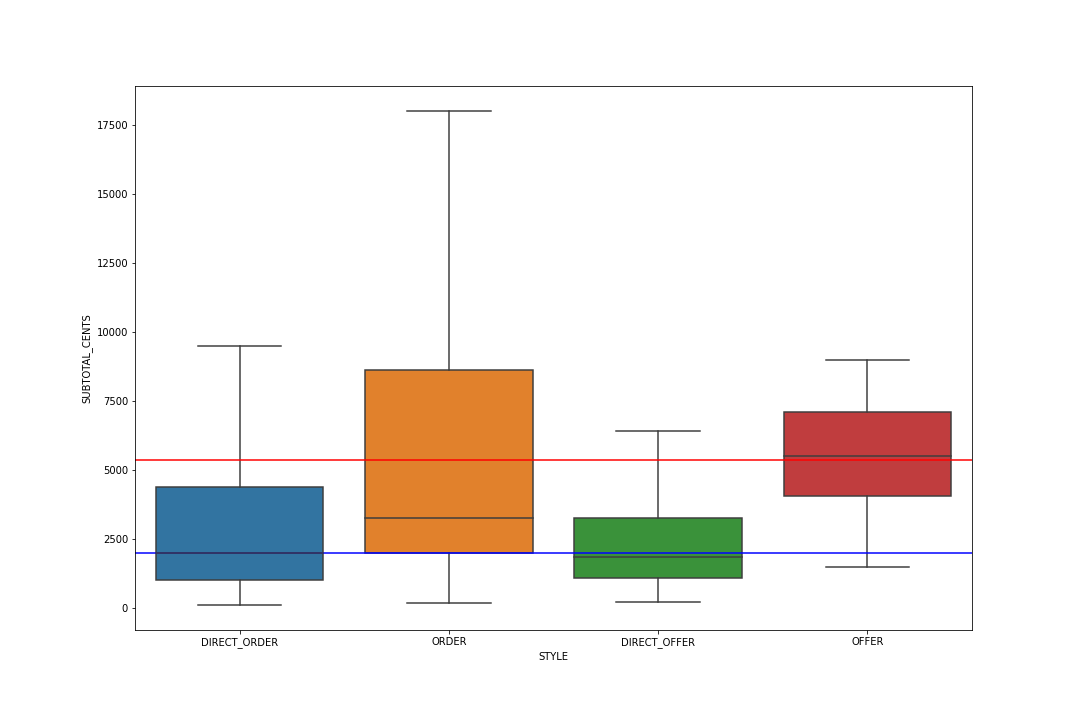

**Channels**
- 58420 out of 60822 purchases during this period were through the live stream channel, and are categorized as follows:
    - 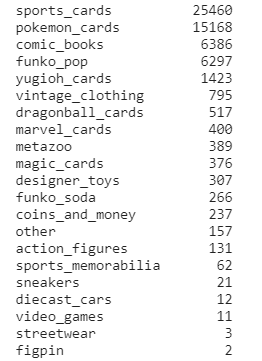

- The livestream channel seems to produce a higher median sale price per order compared to the standard channel
    - 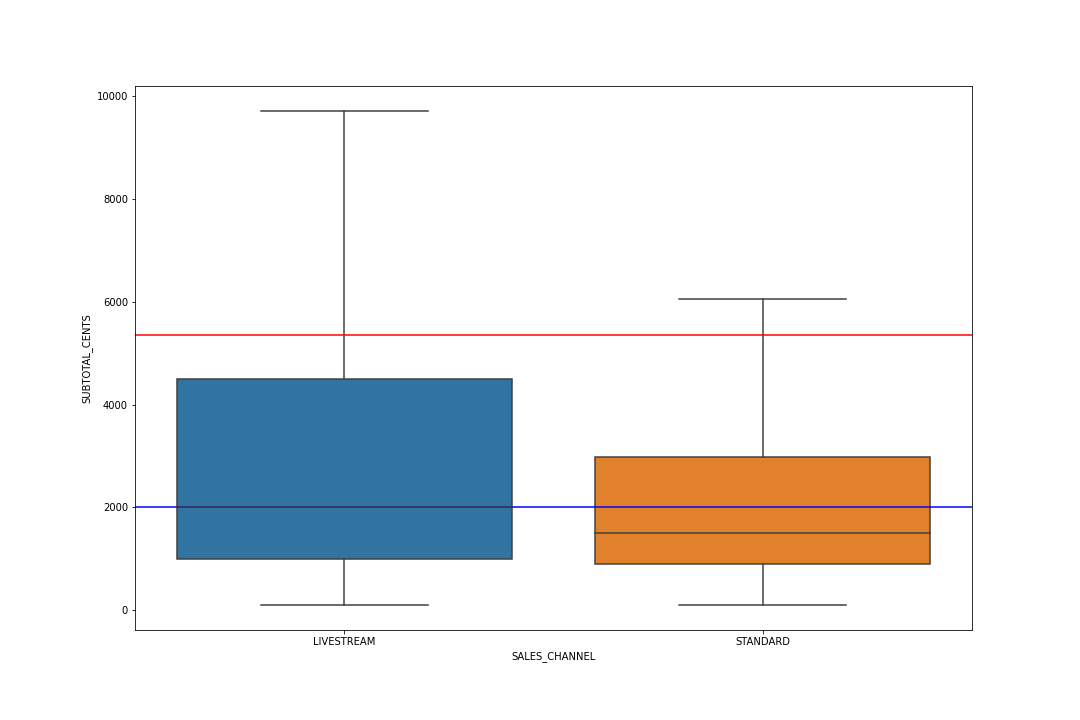
    
**Sales (in dollars)**
- Total sales: 3,253,247.24
- Average sales per order: 53.49
- Median sales per order: 20.00
- max sales: 9,425
- Majority of sales between 10 and 44
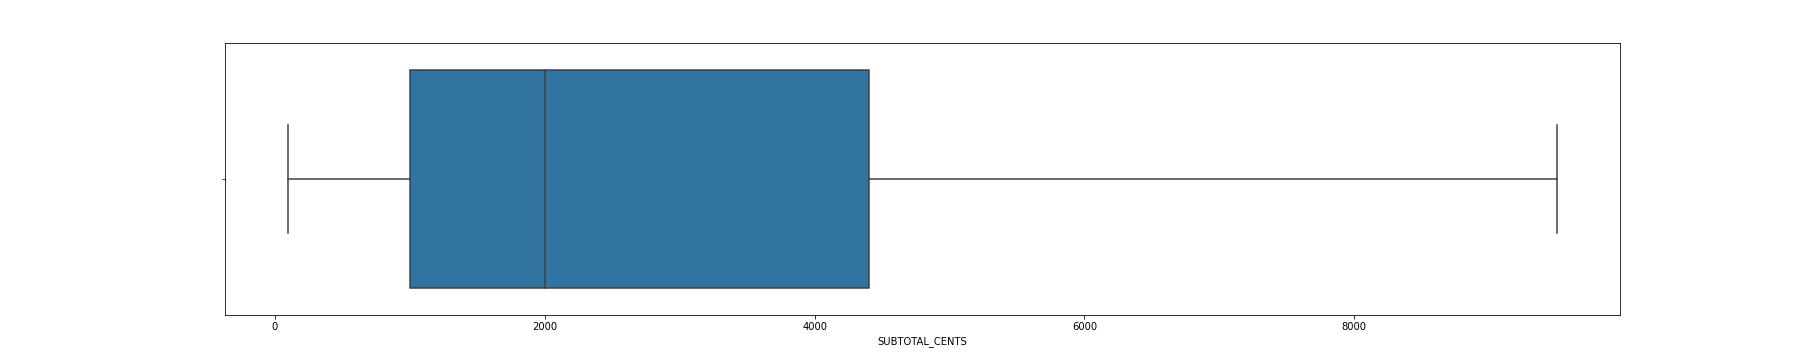
- The only categories that had a median sale higher than the overall median of 20 dollars are sports cards, pokemon cards, figpin, metazoo, sneakers, and streetwear
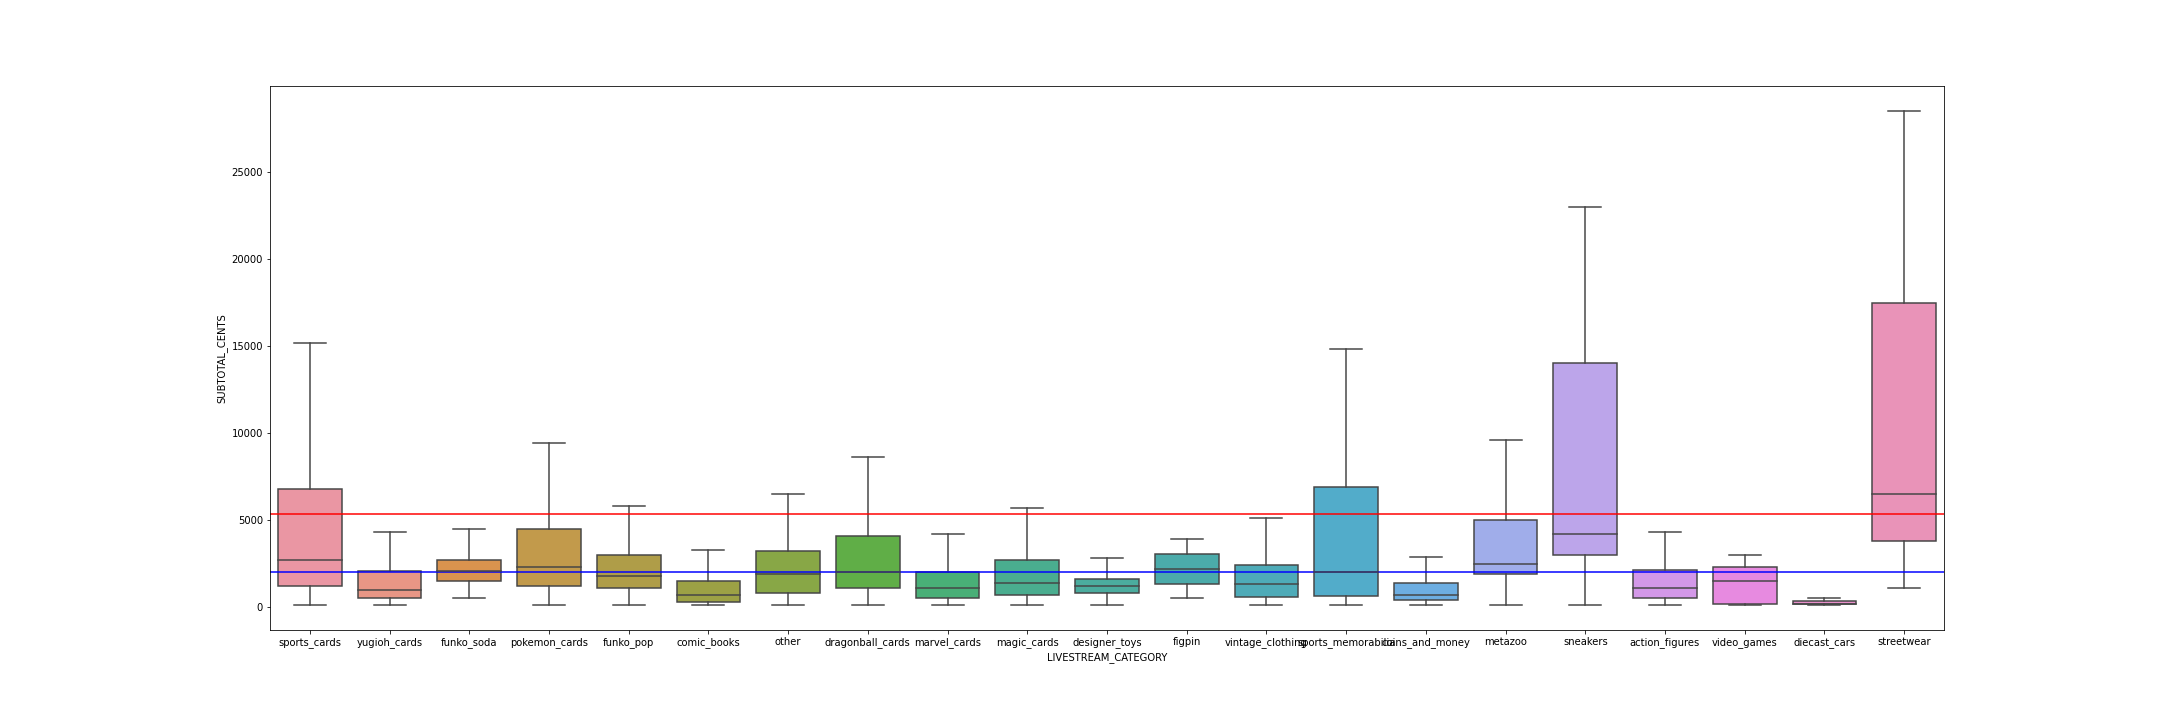

**Time**
- There may be a slight pattern between the day of the week vs engagement, but it doesn't appear too obvious
    - all activities (signups, livestreams, purchases) appear to be distributed relatively evently throughout the weekdays
    - The day with the most purchases is Thursday, and the least purchases is Monday
    - The day with the most buyer and seller signups Tuesday, and the least is Saturday
    - The day with the most first-time livestreams is Wednesday, and the least is Monday
    - 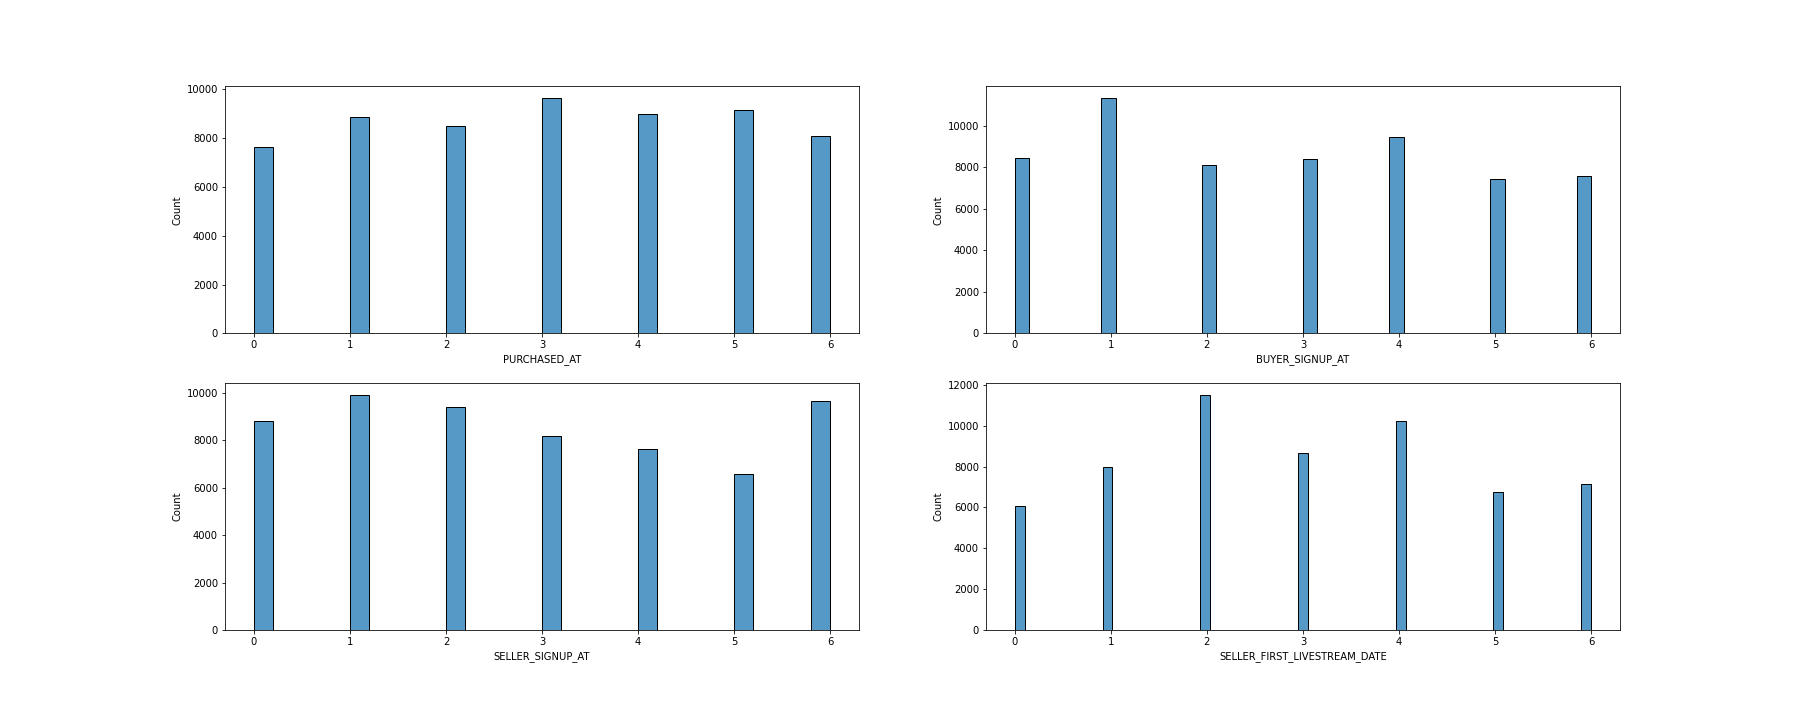
- There's a much clearer pattern between hour of the day vs engagement -- The majority of activity (signup, livestreams, purchases) happen outside the hours of 7am-3pm (adjusted for local times)
    - 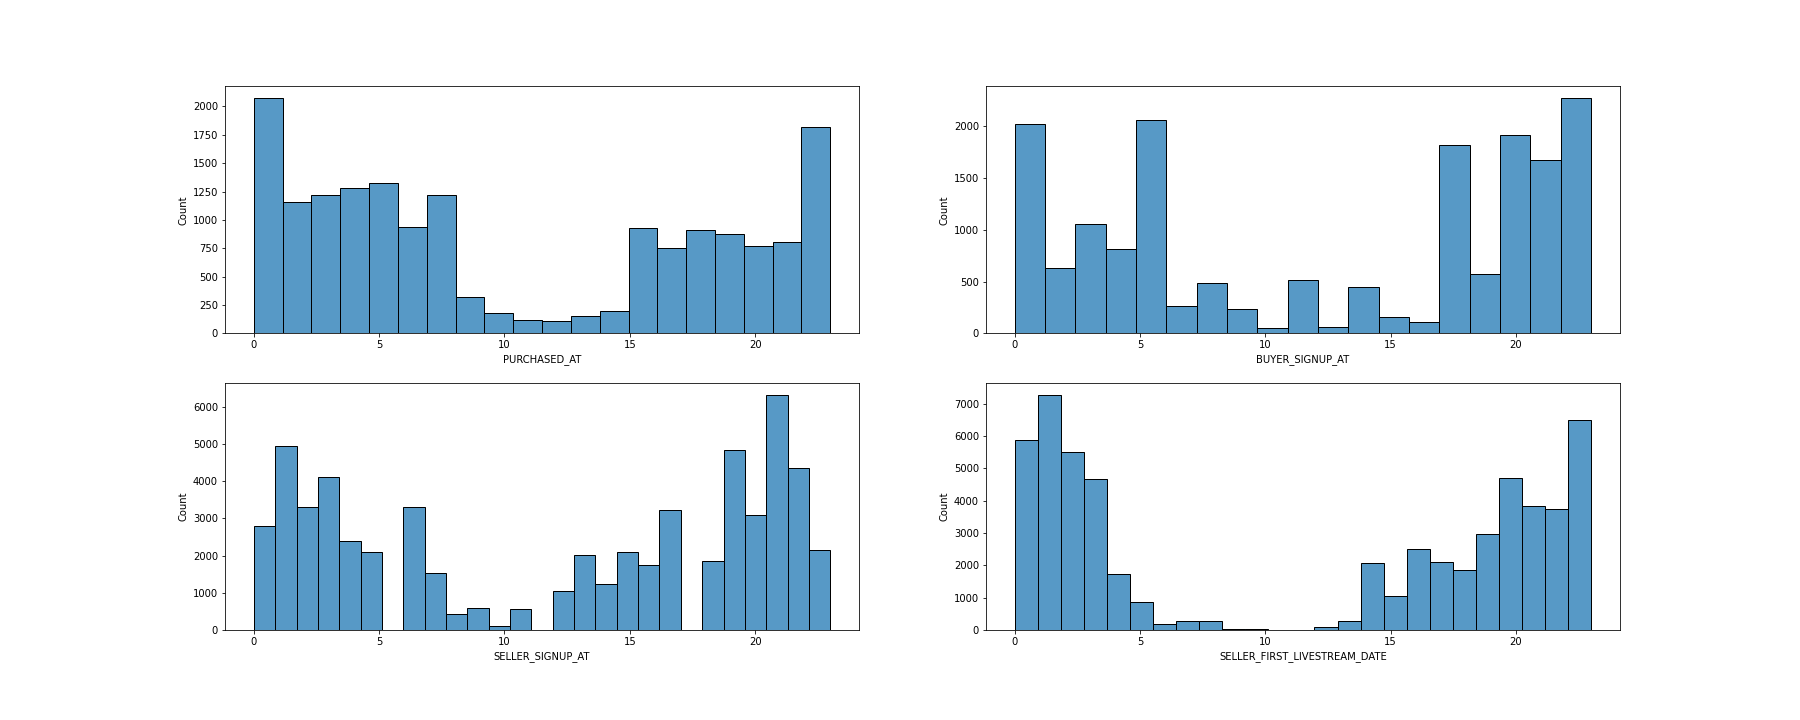